<a href="https://colab.research.google.com/github/isravazquez/equipo_3_datascience/blob/master/Postwork-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 3

## Data Science on Bedu

## Integrantes:
* Arriaga Palma Fernando, arriaga141@gmail.com
* Hernández Angulo Juan de Jesus, jhernandezangulo@gmail.com
* Martínez Ibarra Hugo, hugomtzib@gmail.com
* Moreno Abrego Bryan Daniel, abre.go@outlook.com
* Silva Tijerina Gilberto, gilberto.silvat2812@gmail.com
* Vazquez Bernal Jaime Israel, israfullshot@gmail.com

_Se usará la biblioteca_ `ggplot2` y `dplyr`

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Ahora graficaremos probabilidades (estimadas) marginales y conjuntas para el número de goles que anotan en un partido el equipo de casa o el equipo visitante.

Con el último _data frame_ obtenido en el postwork de la sesión 2 _(data_cleaned)_, elabora tablas de frecuencias relativas para estimar las siguientes probabilidades.

_El CSV se alojó en un servidor de Azure_:

In [2]:
data_cleaned <- read.csv('https://bedu-ds.azurewebsites.net/data/data_cleaned.csv')

La probabilidad (conjunta) de que el equipo que juega en casa anote "x" goles y el equipo que juega como visitante anote "y" goles (x=0,1,2,, y=0,1,2,)

Se genera primero la tabla de frecuencias absolutas.

In [3]:
(table_goals <- table(data_cleaned$FTHG, data_cleaned$FTAG))

   
      0   1   2   3   4   5   6
  0  89  92  52  21   6   5   0
  1 132 131  78  20  10   2   0
  2 100 107  70  13  10   2   2
  3  51  37  28   7   2   2   1
  4  16  12   8   0   4   0   0
  5  10   6   5   0   1   0   0
  6   3   2   0   1   0   0   0
  7   0   1   0   0   0   0   0
  8   0   0   1   0   0   0   0

Eventos totales. Notar que coincide precisamente con el número total de partidos, lo cual es correcto.

In [4]:
sum(table_goals)

[1] 1140

Se construye la tabla de frecuencias relativas al calcular las proporciones de la tabla de frecuencias absolutas.

In [5]:
(joint_proba <- prop.table(table_goals))

   
              0           1           2           3           4           5
  0 0.078070175 0.080701754 0.045614035 0.018421053 0.005263158 0.004385965
  1 0.115789474 0.114912281 0.068421053 0.017543860 0.008771930 0.001754386
  2 0.087719298 0.093859649 0.061403509 0.011403509 0.008771930 0.001754386
  3 0.044736842 0.032456140 0.024561404 0.006140351 0.001754386 0.001754386
  4 0.014035088 0.010526316 0.007017544 0.000000000 0.003508772 0.000000000
  5 0.008771930 0.005263158 0.004385965 0.000000000 0.000877193 0.000000000
  6 0.002631579 0.001754386 0.000000000 0.000877193 0.000000000 0.000000000
  7 0.000000000 0.000877193 0.000000000 0.000000000 0.000000000 0.000000000
  8 0.000000000 0.000000000 0.000877193 0.000000000 0.000000000 0.000000000
   
              6
  0 0.000000000
  1 0.000000000
  2 0.001754386
  3 0.000877193
  4 0.000000000
  5 0.000000000
  6 0.000000000
  7 0.000000000
  8 0.000000000

Esta tabla, cada celda/entrada, ya representa la probabilidad (conjunta) de que el equipo que juega en casa anote "x" goles y el equipo que juega como visitante anote "y" goles (x = 0, 1, 2, ..., y = 0, 1, 2, ...)

Para calcular la probabilidad (marginal) de que el equipo que juega en casa anote "x" goles (x = 0, 1, 2, ...) es suficiente con realizar las sumas por renglón; es decir, para cada número "x" de goles anotados por el equipo que juega en casa.

In [6]:
(marginal_p_home <- rowSums(joint_proba))

0           1           2           3           4           5 
0.232456140 0.327192982 0.266666667 0.112280702 0.035087719 0.019298246 
          6           7           8 
0.005263158 0.000877193 0.000877193

Se crea un data frame adecuado para poder graficar; esto es, un arreglo de valores en eje de las abcisas y valores en el eje de las ordenadas para crear un gráfico de barras.

In [7]:
marginal_proba_home <- data.frame(x = as.character(0:8), Px = marginal_p_home)

Luego se realiza la gráfica de barras de esa probabilidad marginal de "x" al usar la geometría `geom_col()` pues esta requiere los valores de las abcisas y ordenadas para ser graficados.

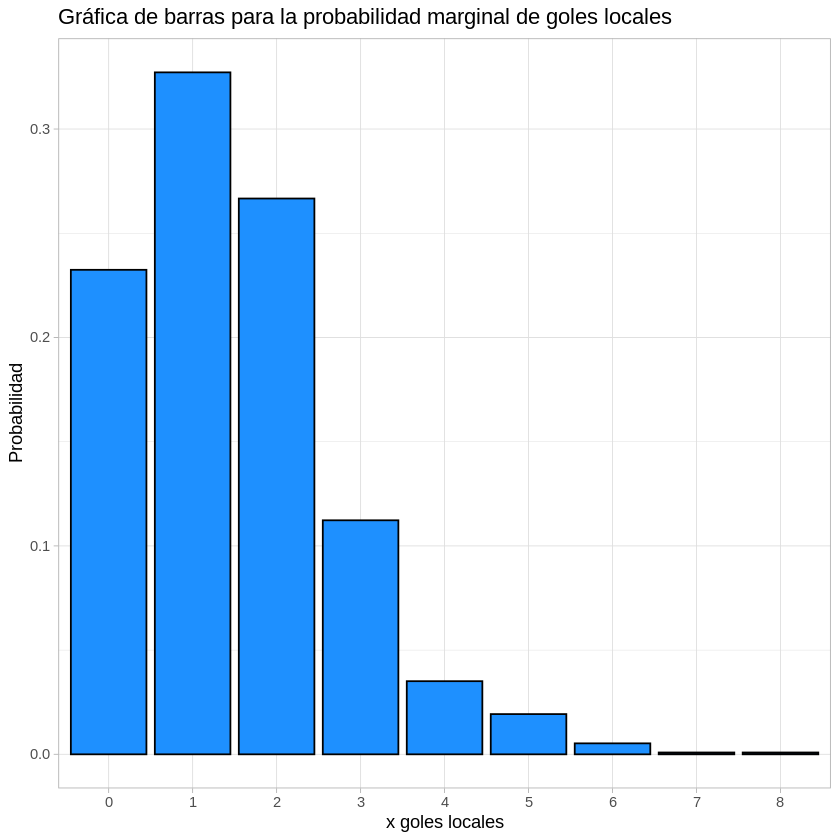

In [8]:
ggplot(marginal_proba_home, aes(x, Px)) + geom_col(col = "black", fill = "dodgerblue") +
ggtitle("Gráfica de barras para la probabilidad marginal de goles locales") +
  ylab("Probabilidad") +
  xlab("x goles locales") +
  theme_light()

Para calcular La probabilidad (marginal) de que el equipo que juega como visitante anote "y" goles (y = 0, 1, 2, ...) es suficiente con realizar las sumas por columna; es decir, para cada número "y" de goles anotados por el equipo que juega como visitante.

In [9]:
(marginal_p_away <- colSums(joint_proba))

0           1           2           3           4           5 
0.351754386 0.340350877 0.212280702 0.054385965 0.028947368 0.009649123 
          6 
0.002631579

Igual que el conjunto de datos anterior, se crea el _data frame_ adecuado a graficar.

In [10]:
marginal_proba_away <- data.frame(y = as.character(0:6), Py = marginal_p_away)

Se grafica la probabilidad marginal de "y" al usar la misma geometría emncionada antes.

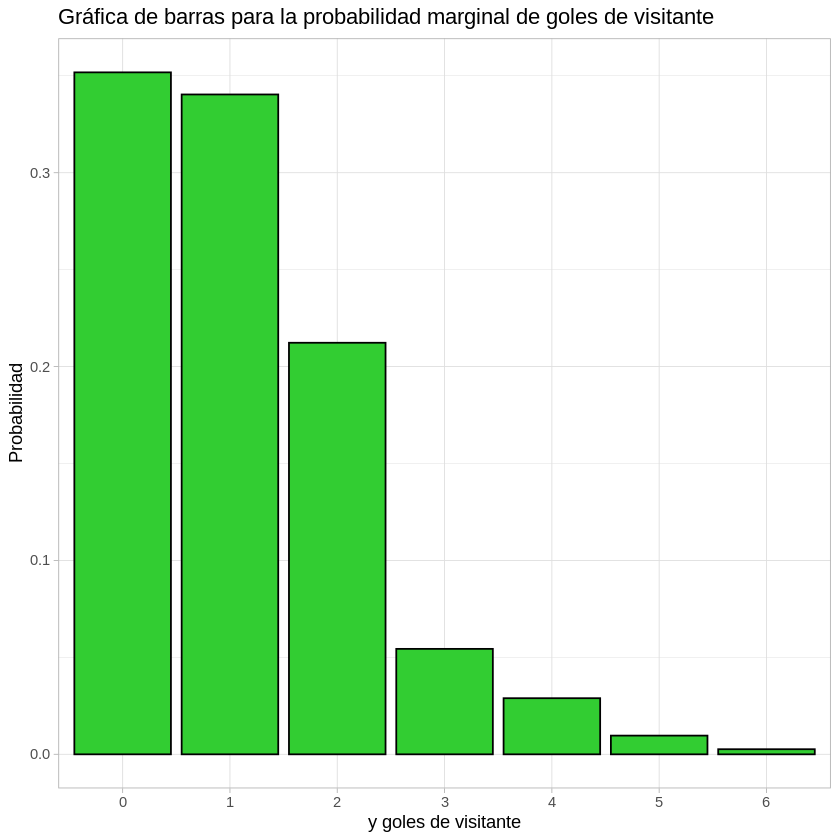

In [11]:
ggplot(marginal_proba_away, aes(y, Py)) + geom_col(col = "black", fill = "limegreen") +
  ggtitle("Gráfica de barras para la probabilidad marginal de goles de visitante") +
  ylab("Probabilidad") +
  xlab("y goles de visitante") +
  theme_light()

Un HeatMap para las probabilidades conjuntas estimadas de los números de goles que anotan el equipo de casa y el equipo visitante en un partido. Primero se convertira en un data frame la información de la probabilidad conjunta.

In [12]:
joint_proba_goals <- as.data.frame(joint_proba)
joint_proba_goals <- rename(joint_proba_goals, x = Var1, y = Var2, Pxy = Freq)

Se grafica el mapa de calor, la probabilidad conjunta, la probabilidad por cada coordenada x-y.

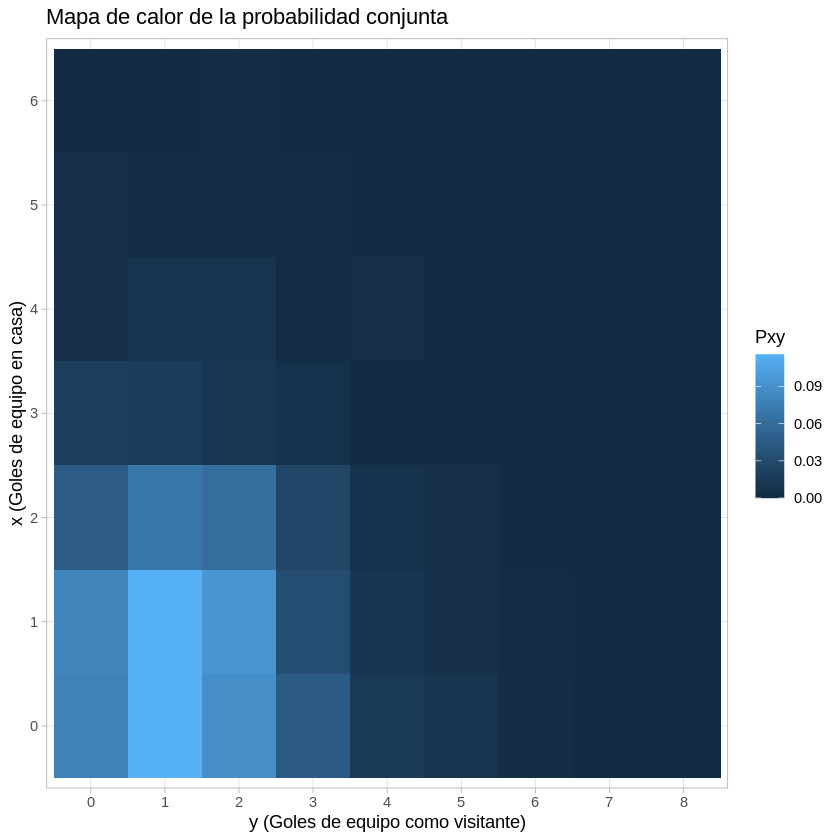

In [13]:
ggplot(joint_proba_goals, aes(x, y, fill = Pxy)) + geom_tile() +
  ggtitle("Mapa de calor de la probabilidad conjunta") +
  ylab("x (Goles de equipo en casa)") +
  xlab("y (Goles de equipo como visitante)") +
  theme_light()

La siguiente gráfica representa un análisis de probabilidades por cada gol como local al fijar el número de goles de visitante.

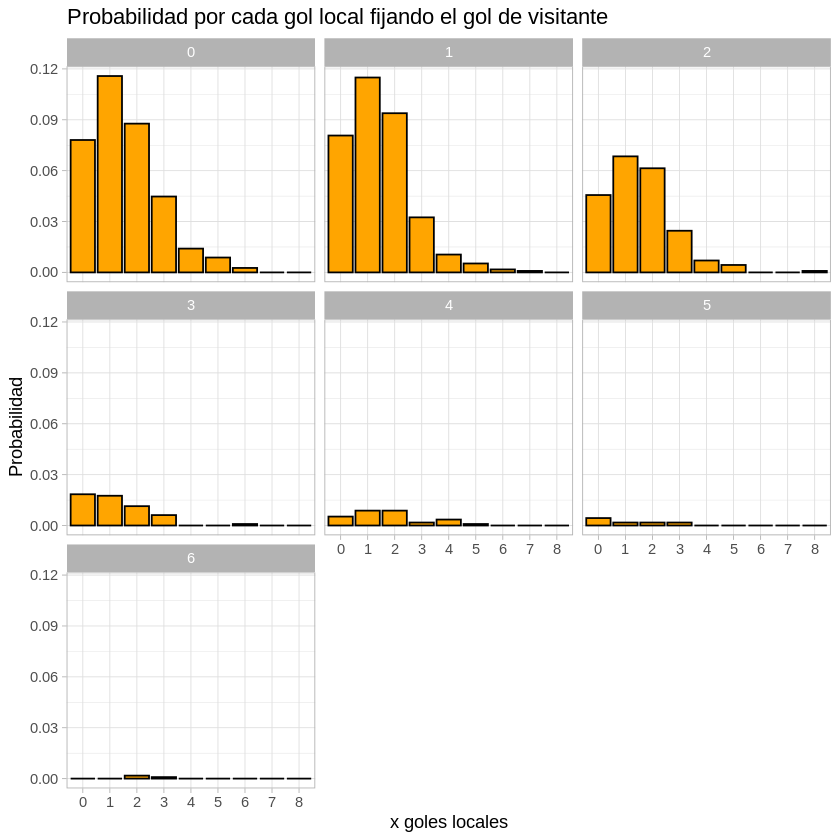

In [14]:
ggplot(joint_proba_goals, aes(x, y = Pxy)) + geom_col(col = "black", fill = "orange") +
  facet_wrap("y") +
  ggtitle("Probabilidad por cada gol local fijando el gol de visitante") +
  ylab("Probabilidad") +
  xlab("x goles locales") +
  theme_light()